# VF2 Layout : The layout allocation as a subgraph isomorphism problem

https://github.com/Qiskit/qiskit-terra/pull/6620


In [1]:
import numpy
from qiskit.circuit.library import GraphState
from qiskit.test.mock import FakeMumbai
from qiskit.transpiler import CouplingMap
from qiskit.transpiler.passes import VF2Layout, CSPLayout
from qiskit.visualization import plot_gate_map, plot_circuit_layout

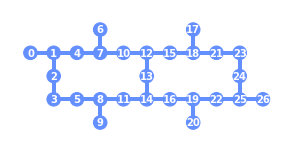

┌───┐                                                                  
 q_0: ┤ H ├─────────────■─────────────────■──────────────────────────────────
      ├───┤             │                 │                                  
 q_1: ┤ H ├──────────■──┼─────────────────┼──────────────────────────────────
      ├───┤          │  │                 │                                  
 q_2: ┤ H ├─■────────┼──┼─────■───────────┼───────────■──────────────────────
      ├───┤ │        │  │     │           │           │                      
 q_3: ┤ H ├─┼─────■──┼──┼─────┼─────■─────┼───────────┼──────────────────────
      ├───┤ │     │  │  │     │     │     │           │                      
 q_4: ┤ H ├─■─────┼──┼──┼─────┼──■──┼─────┼───────────┼──────────────────────
      ├───┤       │  │  │     │  │  │     │           │                      
 q_5: ┤ H ├───────┼──┼──┼─────┼──┼──┼─────┼────────■──┼──────────────────────
      ├───┤       │  │  │     │  │  │     │        │  │                      
 q_6: ┤ H ├────■──┼──┼──┼──■──┼──┼──┼─────┼────────┼──┼──■───────────────────
      ├───┤    │  │  │  │  │  │  │  │     │        │  │  │                   
 q_7: ┤ H ├─■──┼──┼──┼──┼──┼──┼──┼──┼──■──┼────────┼──┼──┼───────────────────
      ├───┤ │  │  │  │  │  │  │  │  │  │  │        │  │  │                   
 q_8: ┤ H ├─■──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼─────■──┼──┼──┼────────■──────────
      ├───┤    │  │  │  │  │  │  │  │  │  │     │  │  │  │        │          
 q_9: ┤ H ├────┼──┼──┼──┼──┼──┼──┼──┼──┼──┼─────┼──┼──┼──┼─────■──┼──■───────
      ├───┤    │  │  │  │  │  │  │  │  │  │     │  │  │  │     │  │  │       
q_10: ┤ H ├────■──┼──┼──┼──┼──┼──┼──┼──┼──┼──■──┼──┼──┼──┼─────┼──┼──┼───────
      ├───┤       │  │  │  │  │  │  │  │  │  │  │  │  │  │     │  │  │       
q_11: ┤ H ├───────┼──┼──┼──■──┼──┼──┼──┼──┼──┼──■──┼──┼──┼─────┼──┼──┼───────
      ├───┤       │  │  │     │  │  │  │  │  │     │  │  │     │  │  │       
q_12: ┤ H ├───────┼──┼──┼─────■──┼──┼──┼──┼──┼─────┼──┼──┼──■──┼──┼──┼───────
      ├───┤       │  │  │        │  │  │  │  │     │  │  │  │  │  │  │       
q_13: ┤ H ├───────┼──┼──┼────────■──┼──┼──┼──┼─────■──┼──┼──┼──■──┼──┼───────
      ├───┤       │  │  │           │  │  │  │        │  │  │     │  │       
q_14: ┤ H ├───────┼──┼──┼───────────┼──┼──┼──┼────────■──┼──┼─────┼──┼───────
      ├───┤       │  │  │           │  │  │  │           │  │     │  │       
q_15: ┤ H ├───────┼──┼──┼──■──■─────┼──┼──┼──┼───────────┼──┼─────┼──┼───────
      ├───┤       │  │  │  │  │     │  │  │  │           │  │     │  │       
q_16: ┤ H ├───────■──┼──┼──┼──┼─────┼──┼──┼──┼─────■─────┼──┼─────┼──┼───────
      ├───┤          │  │  │  │     │  │  │  │     │     │  │     │  │       
q_17: ┤ H ├──────────┼──┼──┼──┼─────┼──┼──┼──┼─────┼─────┼──┼─────■──┼──■────
      ├───┤          │  │  │  │     │  │  │  │     │     │  │        │  │    
q_18: ┤ H ├──────────■──┼──■──┼─────┼──┼──┼──┼──■──┼─────┼──┼────────┼──┼────
      ├───┤             │     │     │  │  │  │  │  │     │  │        │  │    
q_19: ┤ H ├─────────────┼─────┼─────■──┼──┼──┼──■──┼─────┼──┼────────┼──┼────
      ├───┤             │     │        │  │  │     │     │  │        │  │    
q_20: ┤ H ├─────────────┼─────┼────────┼──┼──┼─────┼─────┼──┼────────┼──┼──■─
      ├───┤             │     │        │  │  │     │     │  │        │  │  │ 
q_21: ┤ H ├─────────────■─────┼────────■──┼──┼─────┼─────┼──┼────────■──┼──┼─
      ├───┤                   │           │  │     │     │  │           │  │ 
q_22: ┤ H ├───────────────────┼───────────┼──┼─────┼──■──┼──┼───────────┼──┼─
      ├───┤                   │           │  │     │  │  │  │           │  │ 
q_23: ┤ H ├───────────────────┼───────────■──┼─────■──■──┼──┼───────────┼──┼─
      ├───┤                   │              │           │  │           │  │ 
q_24: ┤ H ├───────────────────■──────────────┼───────────┼──┼───────────■──■─
      ├───┤                                  │           │  │                
q_25: ┤ H ├─────────────────

In [21]:
backend = FakeMumbai()
config = backend.configuration()
cm = config.coupling_map
size = config.n_qubits
display(plot_gate_map(backend))

rows = [x[0] for x in cm]
cols = [x[1] for x in cm]

A = numpy.zeros((size, size))
A[rows, cols] = 1

from random import shuffle
random_map = list(range(size))
shuffle(random_map)
B = numpy.zeros((size, size))
for i in range(size):
    for j in range(size):
        B[i][j] = A[random_map[i]][random_map[j]]
A = B
    
circuit = GraphState(A).decompose()
circuit.draw(fold=-1)

In [22]:
vf2_pass = VF2Layout(CouplingMap(cm))
csp_pass = CSPLayout(CouplingMap(cm), time_limit=None, call_limit=None)

In [23]:
csp_transpiled = csp_pass(circuit)

In [24]:
vf2_transpiled = vf2_pass(circuit)

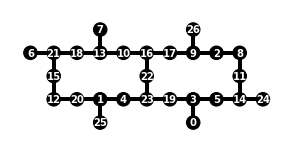

In [11]:
plot_circuit_layout(vf2_transpiled, backend)

In [ ]:
plot_circuit_layout(csp_transpiled, backend)

In [28]:
from qiskit import QuantumCircuit

# T-shape interaction map
circuit = QuantumCircuit(5)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.cx(0,3)
circuit.cx(3,4)

In [31]:
# Multiple possible answers. This allows for noise-awareness (ish).
vf2_transpiled = vf2_pass(circuit)
vf2_transpiled

Layout({
11: Qubit(QuantumRegister(5, 'q'), 2),
16: Qubit(QuantumRegister(5, 'q'), 1),
12: Qubit(QuantumRegister(5, 'q'), 4),
14: Qubit(QuantumRegister(5, 'q'), 0),
13: Qubit(QuantumRegister(5, 'q'), 3)
})